### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Missing values:
 car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

Number of duplicate rows: 74

Data types:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
dir

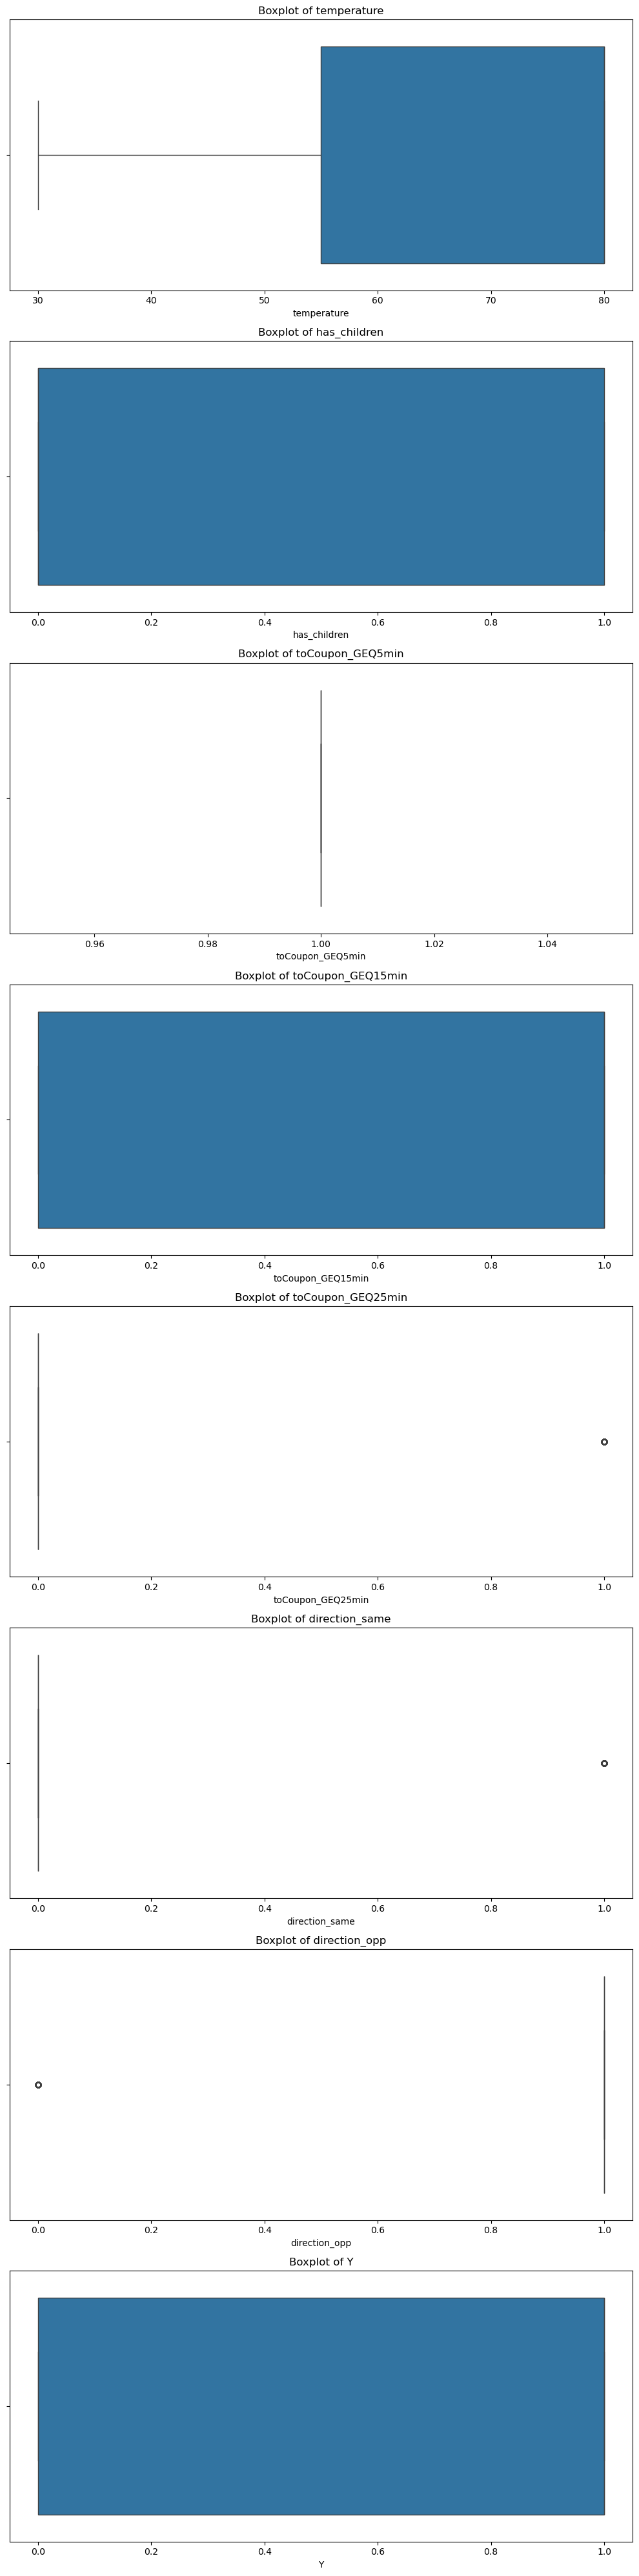


Unique values in destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

Unique values in passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

Unique values in weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

Unique values in time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

Unique values in coupon:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Unique values in expiration:
expiration
1d    7091
2h    5593
Name: count, dtype: int64

Unique values in gender:
gender
Female    6511
Male      6173
Name: count, dtype: int64

Unique values in age:
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check for inconsistent data types
print("\nData types:")
print(data.dtypes)

# Check for outliers in numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5*len(numerical_columns)))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Check for inconsistent categories in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].value_counts())

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# Column car has many missing values - check what % of data is missing 

car_missing_percentage = (data['car'].isnull().sum() / len(data)) * 100
print(f"Percentage of missing values in 'car' column: {car_missing_percentage:.2f}%")

#99.15% of the values in the 'car' column is missing, making it not useful - > remove
data_no_car = data.drop('car', axis=1)
print("The 'car' column has been removed from the dataset.")

Percentage of missing values in 'car' column: 99.15%
The 'car' column has been removed from the dataset.


4. What proportion of the total observations chose to accept the coupon?



In [14]:
#Proportion of total observations that chose to accept the coupon:
total_observations = len(data)
accepted_coupons = data['Y'].sum()
acceptance_rate = accepted_coupons / total_observations

print(f"Total observations: {total_observations}")
print(f"Accepted coupons: {accepted_coupons}")
print(f"Acceptance rate: {acceptance_rate:.2%}")

Total observations: 12684
Accepted coupons: 7210
Acceptance rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

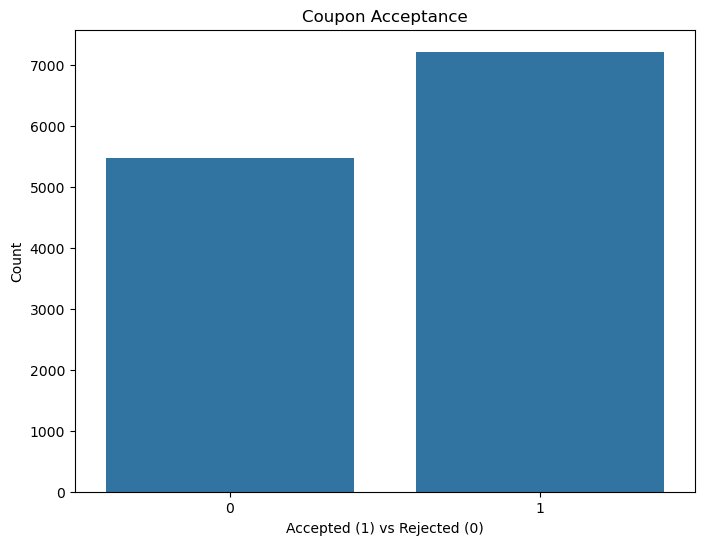

In [16]:
# Visualize the acceptance rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=data)
plt.title('Coupon Acceptance')
plt.xlabel('Accepted (1) vs Rejected (0)')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

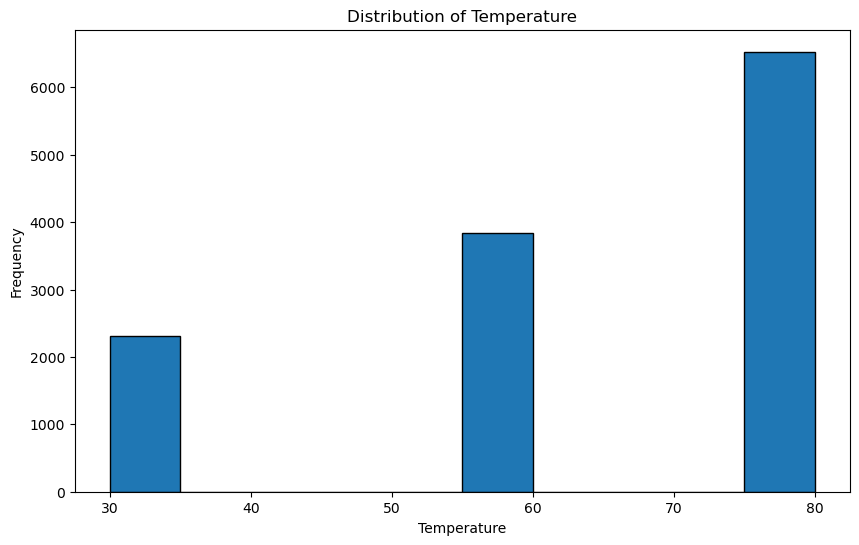

In [18]:
# Create a histogram of the temperature column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
# Create a new DataFrame with only bar coupons from the cleaned version of the data
bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [22]:
# Calculate the acceptance rate
total_bar_coupons = len(bar_coupons)
accepted_bar_coupons = bar_coupons['Y'].sum()
acceptance_rate_bar = accepted_bar_coupons / total_bar_coupons

print(f"Total bar coupons: {total_bar_coupons}")
print(f"Accepted bar coupons: {accepted_bar_coupons}")
print(f"Acceptance rate: {acceptance_rate_bar:.2%}")

Total bar coupons: 2017
Accepted bar coupons: 827
Acceptance rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Calculate acceptance rate for users who went to a bar 3 or fewer times a month
bar_3_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean()

# Calculate acceptance rate for users who went to a bar more than 3 times a month
bar_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [26]:
# Calculate acceptance rate for drivers who go to a bar more than once a month and are over 25
group1 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                     (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))]
acceptance_rate_group1 = group1['Y'].mean()

# Calculate acceptance rate for all others
group2 = bar_coupons[~((bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                       (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))]
acceptance_rate_group2 = group2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_group1:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_group2:.2%}")
print(f"Conclusion: Drivers who go to a bar more than once a month and are over 25 are more than twice as likely to accept the Bar coupon than other drivers")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.52%
Acceptance rate for all others: 33.50%
Conclusion: Drivers who go to a bar more than once a month and are over 25 are more than twice as likely to accept the Bar coupon than other drivers


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
# Calculate acceptance rate for the specified group
#drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
group3 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                     (bar_coupons['passanger'] != 'Kid(s)') & 
                     (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]
acceptance_rate_group3 = group3['Y'].mean()

print(f"Acceptance rate for the specified group: {acceptance_rate_group3:.2%}")
print(f"Acceptance rate for all others: {acceptance_rate_group2:.2%}")
print(f"Conclusion: Drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more than twice as likely to accept the Bar coupon than other drivers")

Acceptance rate for the specified group: 71.32%
Acceptance rate for all others: 33.50%
Conclusion: Drivers who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more than twice as likely to accept the Bar coupon than other drivers


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [30]:
#Specify the groups thats:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed:
group4 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                     (bar_coupons['passanger'] != 'Kid(s)') & 
                     (~bar_coupons['maritalStatus'].isin(['Widowed']))]

#go to bars more than once a month and are under the age of 30 OR:
group5 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))& 
                     (bar_coupons['age'].isin(['21', '26']))]

#go to cheap restaurants more than 4 times a month and income is less than 50K:
group6 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8']))& 
                     (bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]


# Calculate acceptance rates
acceptance_rate4 = group4['Y'].mean()
acceptance_rate5 = group5['Y'].mean()
acceptance_rate6 = group6['Y'].mean()

print(f"Acceptance rate for Group 1: {acceptance_rate4:.2%}")
print(f"Acceptance rate for Group 2: {acceptance_rate5:.2%}")
print(f"Acceptance rate for Group 3: {acceptance_rate6:.2%}")

Acceptance rate for Group 1: 71.32%
Acceptance rate for Group 2: 73.13%
Acceptance rate for Group 3: 78.70%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [68]:
print(f"All three groups are more than 70% likely to accept coupons, with Group 3 being the most likely to accept them: 78.70% chance")

All three groups are more than 70% likely to accept coupons, with Group 3 being the most likely to accept them with 78.70% chance


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### My choice of coupon group: Coffee House

Now, let's analyze the characteristics of passengers who accept coffee house coupons.  

1. First, let's calculate the overall acceptance rate for coffee house coupons:

In [36]:
#overall acceptance rate for coffee house coupons:
coffee_coupons = data[data['coupon'] == 'Coffee House']
acceptance_rate_coffee = coffee_coupons['Y'].mean()

print(f"Overall coffee house coupon acceptance rate: {acceptance_rate:.2%}")

Overall coffee house coupon acceptance rate: 56.84%


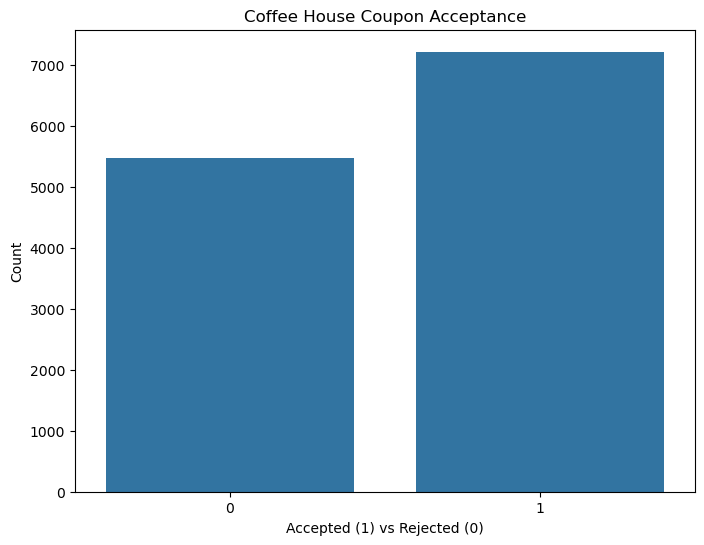

In [66]:
# Visualize the acceptance rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=data)
plt.title('Coffee House Coupon Acceptance')
plt.xlabel('Accepted (1) vs Rejected (0)')
plt.ylabel('Count')
plt.show()

2. Let's explore various factors that might influence coffee house coupon acceptance:
   
- Frequency of Coffee House Visits
- Time of Day
- Age Group
- Income Level

In [39]:
#Frequency of Coffee House Visits
acceptance_by_frequency = coffee_coupons.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by coffee house visit frequency:")
print(acceptance_by_frequency)

Acceptance rate by coffee house visit frequency:
CoffeeHouse
4~8      0.685874
gt8      0.657895
1~3      0.647793
less1    0.481860
never    0.188781
Name: Y, dtype: float64


In [40]:
#Time of Day
acceptance_by_time = coffee_coupons.groupby('time')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by time of day:")
print(acceptance_by_time)

Acceptance rate by time of day:
time
10AM    0.640712
2PM     0.547859
7AM     0.445783
10PM    0.424242
6PM     0.412626
Name: Y, dtype: float64


In [41]:
#Age group
acceptance_by_age = coffee_coupons.groupby('age')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by age group:")
print(acceptance_by_age)

Acceptance rate by age group:
age
below21    0.696774
21         0.524349
26         0.514828
46         0.513636
41         0.501538
31         0.476726
36         0.467662
50plus     0.420183
Name: Y, dtype: float64


In [42]:
#Income
acceptance_by_income = coffee_coupons.groupby('income')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by income level:")
print(acceptance_by_income)

Acceptance rate by income level:
income
$87500 - $99999     0.557196
Less than $12500    0.551948
$37500 - $49999     0.542373
$12500 - $24999     0.540404
$50000 - $62499     0.503650
$100000 or More     0.494382
$25000 - $37499     0.473438
$62500 - $74999     0.436364
$75000 - $87499     0.296610
Name: Y, dtype: float64


Step 2 Findings:

Characteristics of Likely Acceptors of the Coffee House Coupon based on the analysis:
   
- Coffee house visitors (1+ times per months) are about 65% likely to accept coffee house coupons
- Those receiving coupons in the morning (10AM) are likely to accept coupon with 64% rate
- Young adults below 21 are the most likely age group to accept coffee house coupon
- Income Level does not seem to have a strong influence on the coffee house coupon acceptance rate

3. Now I will see whether the combination of the above characteristics increases the chance of accepted coffee house coupon: 
- Group 1: Coffee house visitors (1+ times per months) and under age of 21
- Group 2: Those receiving coupons in the morning (10AM) and under age of 21 
- Group 3: Coffee house visitors (1+ times per months) and those receiving coupons in the morning (10AM)
- Group 4: Coffee house visitors (1+ times per months) and under age of 21, receiving coupons in the morning (10AM)

In [95]:
# Calculate acceptance rate for Group 1: Coffee house visitors (1+ times per months) and under age of 21
group1c = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(['4~8','gt8','1~3'])) & 
                     (coffee_coupons['age'].isin(['below21']))]
acceptance_rate_group1c = group1c['Y'].mean()
print(f"Coffee house coupon acceptance rate for group 1: {acceptance_rate_group1c:.2%}")
print(f"Increased likelyhood of acceptance (compared to overall) : {acceptance_rate_group1c/acceptance_rate_coffee:.2%}")

Coffee house coupon acceptance rate for group 1: 76.27%
Increased likelyhood of acceptance (compared to overall) : 152.77%


In [97]:
#Calculate acceptance rate for Group 2: Those receiving coupons in the morning (10AM) and under age of 21
group2c = coffee_coupons[(coffee_coupons['time'].isin(['10AM'])) & 
                     (coffee_coupons['age'].isin(['below21']))]
acceptance_rate_group2c = group2c['Y'].mean()
print(f"Coffee house coupon acceptance rate for group 2: {acceptance_rate_group2c:.2%}")
print(f"Increased likelyhood of acceptance (compared to overall) : {acceptance_rate_group2c/acceptance_rate_coffee:.2%}")

Coffee house coupon acceptance rate for group 2: 74.29%
Increased likelyhood of acceptance (compared to overall) : 148.79%


In [99]:
#Calculate acceptance rate for Group 3: Coffee house visitors (1+ times per months) and those receiving coupons in the morning (10AM)
group3c = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(['4~8','gt8','1~3'])) & 
                     (coffee_coupons['time'].isin(['10AM']))]
acceptance_rate_group3c = group3c['Y'].mean()
print(f"Coffee house coupon acceptance rate for group 3: {acceptance_rate_group3c:.2%}")
print(f"Increased likelyhood of acceptance (compared to overall) : {acceptance_rate_group3c/acceptance_rate_coffee:.2%}")

Coffee house coupon acceptance rate for group 3: 81.29%
Increased likelyhood of acceptance (compared to overall) : 162.83%


In [101]:
#Calculate acceptance rate for Group 4: Coffee house visitors (1+ times per months) and under age of 21, receiving coupons in the morning (10AM)
group4c = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(['4~8','gt8','1~3'])) & 
                     (coffee_coupons['time'].isin(['10AM']))&
                    (coffee_coupons['age'].isin(['below21']))]
acceptance_rate_group4c = group4c['Y'].mean()
print(f"Coffee house coupon acceptance rate for group 4: {acceptance_rate_group4c:.2%}")
print(f"Increased likelyhood of acceptance (compared to overall) : {acceptance_rate_group4c/acceptance_rate_coffee:.2%}")

Coffee house coupon acceptance rate for group 4: 80.00%
Increased likelyhood of acceptance (compared to overall) : 160.24%


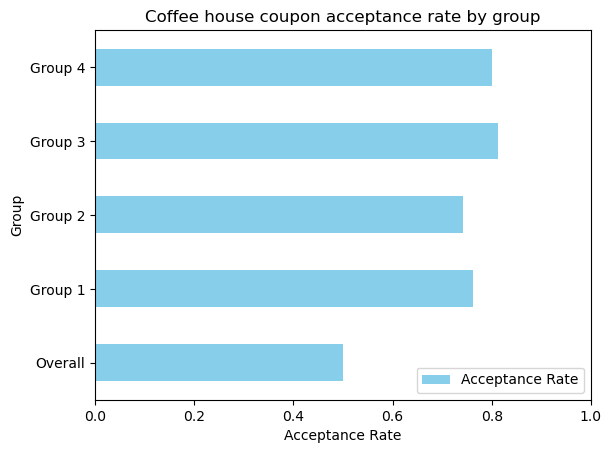

In [119]:
#create a plot showing the summary of the analysis
# Data for the 4 values
data_coffee = {
    'Group': ['Overall','Group 1', 'Group 2', 'Group 3', 'Group 4'],
    'Acceptance Rate': [acceptance_rate_coffee,acceptance_rate_group1c, acceptance_rate_group2c, acceptance_rate_group3c, acceptance_rate_group4c]
}

# Creating a DataFrame
df_coffee = pd.DataFrame(data_coffee)

# Plotting the bar chart
coffee_plot=df_coffee.plot(kind='barh', x='Group', y='Acceptance Rate', color='skyblue')

# Set y-axis to start from 0 and end at 1 
plt.xlim(0, 1)

# Adding labels and title
plt.xlabel('Acceptance Rate')
plt.ylabel('Group')
plt.title('Coffee house coupon acceptance rate by group')

# Displaying the plot
plt.show()

Step 3 findings. 

Analysis showed that group 3: Coffee house visitors (1+ times per months) and those receiving coupons in the morning (10AM) were the most likely group to accept the coffee house coupon (81.29%) and hence is be recommended for targeting on the basis of this analysis.